## QUESTION 1:
### COMPUTING FEATURES
a)	Given an image (wagon.jpg) compute its SURF features 

b)	Display the image with the keypoints on the image. 

c)	Experiment by providing different Hessian Threshold values to the algorithm and find the relationship between the Hessian Threshold and the number of keypoints detected. (*Hint: Start off with a value of 400 and trial increments of 100*). Display the image with fewer keypoints.


Number of original SURF features:  5879
Number of less SURF features:  376


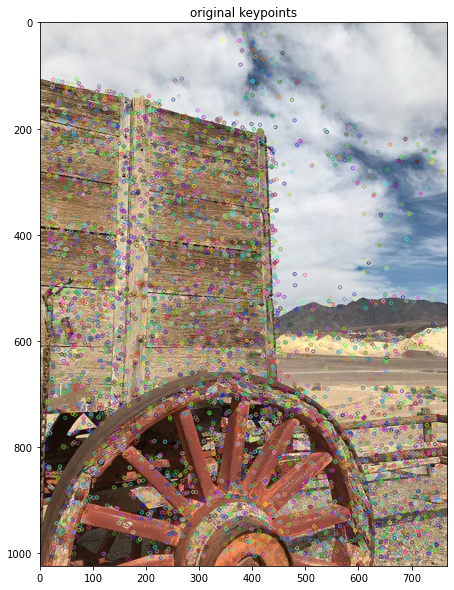

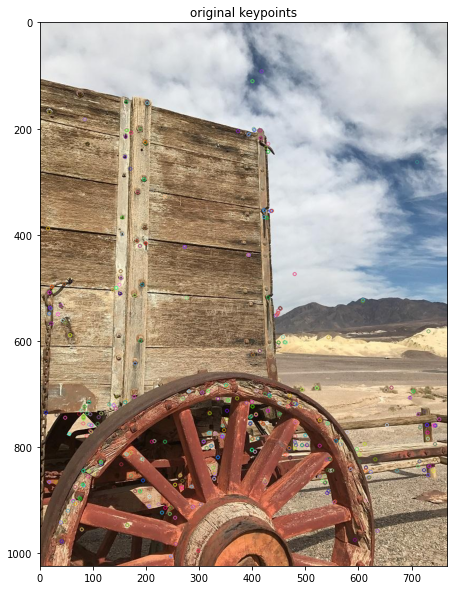

In [1]:
# Question 1

import cv2
import matplotlib.pyplot as plt

# Read image
image = cv2.imread("wagon.jpg")

# Convert image to grayscale
grayImageOrig = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Task1. Initialize SURF detector, detect keypoints, store and show SURF keypoints of original image in a Numpy array
surf = cv2.xfeatures2d.SURF_create(400)

kp,des = surf.detectAndCompute(grayImageOrig, None)
kp_gray = cv2.drawKeypoints(image, kp, grayImageOrig)
kp_gray = cv2.cvtColor(kp_gray, cv2.COLOR_BGR2RGB)

print("Number of original SURF features: ", len(kp))
plt.figure(figsize = (10,10))
plt.title("original keypoints")
plt.imshow(kp_gray)

# Parameters for SURF initializations such that we find only 10% of keypoints

surf.setHessianThreshold(5000)

kp_less,des1 = surf.detectAndCompute(grayImageOrig, None)
kp_gray_less = cv2.drawKeypoints(image, kp_less, grayImageOrig)
kp_gray_less = cv2.cvtColor(kp_gray_less, cv2.COLOR_BGR2RGB)

print("Number of less SURF features: ", len(kp_less))
plt.figure(figsize = (10,10))
plt.title("original keypoints")
plt.imshow(kp_gray_less)
plt.show()



## QUESTION 2: 
### MATCHING TRANSFORMED IMAGE FEATURES
a)	Given three points from the input image ([[0,512], [390,520], [390,0]]) and their corresponding locations in the output image ([[50,475], [390,520], [420,50]]) compute the Affine Transformation matrix and transform the image using the matrix.

b)	Compute the SURF features of this transformed image and show the keypoints on the transformed image.

c)	Match the SURF descriptors of the keypoints of the transformed image with those of the original image using the nearest neighbour ratio method (*Hint: Brute-force matching is available in OpenCV for feature matching*). Draw the matches using cv2.drawMatchesKnn(,,,) function.


Number of rotated SURF features:  410


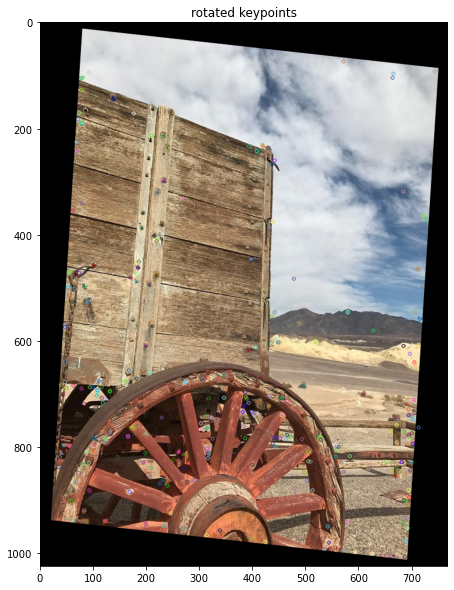

Matched SURF features:  239


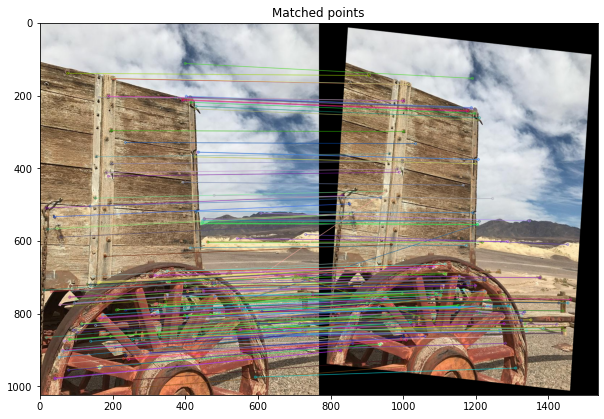

In [2]:
# # Question 2
import math
import numpy as np
import sys

rows, cols, ch = image.shape 
pts1 = np.float32([[0,512],[390,520],[390,0]]) 
  
pts2 = np.float32([[50,475],[390,520],[420,50]]) 
  
M = cv2.getAffineTransform(pts1, pts2) 
dst = cv2.warpAffine(image, M, (cols, rows)) 

# Compute SURF features for rotated image
kp_rotate, des3 = surf.detectAndCompute(dst, None)
kp_gray_rotate = cv2.drawKeypoints(dst, kp_rotate, None)

print("Number of rotated SURF features: ", len(kp_rotate))
plt.figure(figsize = (10,10))
plt.title("rotated keypoints")
plt.imshow(cv2.cvtColor(kp_gray_rotate, cv2.COLOR_BGR2RGB))
plt.show()


# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des3, k=2)

# Apply ratio test
"""This test rejects poor matches by computing the ratio between the best and second-best match. 
If the ratio is below some threshold, the match is discarded as being low-quality."""
good = []
for m, n in matches:
    if m.distance < 0.80 * n.distance:
        good.append([m])
print("Matched SURF features: ",len(good))

# cv2.drawMatchesKnn
result = cv2.drawMatchesKnn(
    image, kp_less,
    dst, kp_rotate,
    good, None, flags=2)

plt.figure(figsize = (10,10))
plt.title("Matched points")
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()